In [1]:
# Name: Shruthi Pasumarthi
# Student ID: 801218392
# HomeWork 1a

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
m = len(housing)
m

545

In [5]:
housing.shape

(545, 13)

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [7]:
df_test.shape

(109, 13)

In [8]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [9]:
trainl = len(df_Newtrain)
testl = len(df_Newtest)

In [10]:
df_Newtrain.shape

(436, 6)

In [11]:
x0 = df_Newtrain.values[:,0]
x1 = df_Newtrain.values[:,1]
x2 = df_Newtrain.values[:,2]
x3 = df_Newtrain.values[:,3]
x4 = df_Newtrain.values[:,4]

In [12]:
x0 = x0.reshape(trainl, 1) 
x1 = x1.reshape(trainl, 1) 
x2 = x2.reshape(trainl, 1) 
x3 = x3.reshape(trainl, 1) 
x4 = x4.reshape(trainl, 1)

y = df_Newtrain.values[:,5]
y = y.reshape(trainl,1)

In [13]:
x00 = np.ones((trainl,1))
X = np.hstack((x00, x0, x1, x2, x3, x4)) 

In [14]:
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta.shape

(6, 1)

In [15]:
def compute_cost (X, y, theta):
    h = X.dot(theta)
    j = np.subtract(h, y)
    j2 = np.square(j)
    J = 1/(2*m) * np.sum(j2)
    
    return J

In [16]:
cost = compute_cost(X, y, theta)
print('The cost for the given values of theta are: ', cost)

The cost for the given values of theta are:  10587991986906.973


In [17]:
# * * * VALIDATION * * *

In [18]:
y_test = df_Newtest['price']
x_test = df_Newtest[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
print(x_test.head(5))
print(y_test.head(5))

      area  bedrooms  bathrooms  stories  parking
239   4000         3          1        2        1
113   9620         3          1        1        2
325   3460         4          1        2        0
66   13200         2          1        1        1
479   3660         4          1        2        0
239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64


In [19]:
yt = y_test.values

In [20]:
x0t = x_test.values[:,0]
x1t = x_test.values[:,1]
x2t = x_test.values[:,2]
x3t = x_test.values[:,3]
x4t = x_test.values[:,4]

In [21]:
x0t = x0t.reshape(testl, 1) 
x1t = x1t.reshape(testl, 1) 
x2t = x2t.reshape(testl, 1) 
x3t = x3t.reshape(testl, 1) 
x4t = x4t.reshape(testl, 1) 
yt = yt.reshape(testl,1)

In [22]:
x00t = np.ones((testl,1))
Xt = np.hstack((x00t, x0t, x1t, x2t, x3t, x4t)) 

In [23]:
theta = np.zeros(6)
theta = theta.reshape(6,1)

In [24]:
def gradient_descent(X, y, theta, alpha, iterations, Xt, yt): 
    cost_history = np.zeros(iterations) 
    Valcost_history = np.zeros(iterations)
    for i in range(iterations):
        #h = theta1.x1 + x0
        h = X.dot(theta) 
        #Loss = h-y
        j = np.subtract(h, y)
        #For the derivative of j wrt theta
        sum_delta = (alpha / m) * X.transpose().dot(j); 
        #Updating the new theta
        theta = theta - sum_delta;
        #Saving it in the history array
        cost_history[i] = compute_cost(X, y, theta)
        Valcost_history[i] = compute_cost(Xt, yt, theta)
        
    return theta, cost_history, Valcost_history

In [25]:
iterations = 15000; 
alpha = 10^-8; 

In [26]:
theta, cost_history, valcost_history= gradient_descent(X, y, theta, alpha, iterations, Xt, yt)
print("Final cost of theta: ", theta)
print('Cost_history: '), cost_history
print('ValCost_history: '), valcost_history

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_23292\1274132957.py:4: RuntimeWarning: overflow encountered in square
  j2 = np.square(j)


Final cost of theta:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Cost_history: 
ValCost_history: 


(None,
 array([2.85457378e+29, 3.46446274e+46, 4.20465645e+63, ...,
                   nan,            nan,            nan]))

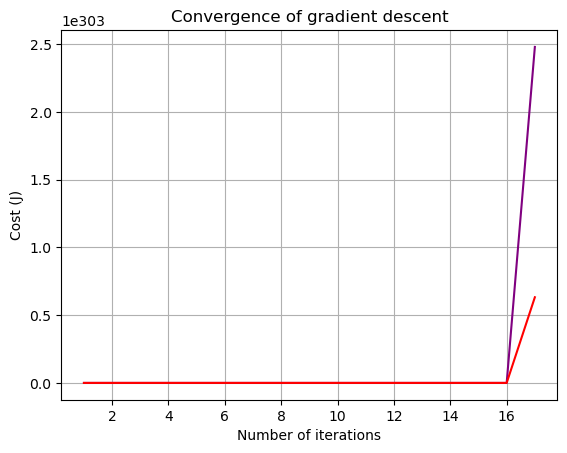

In [27]:
plt.plot(range(1, iterations + 1),cost_history, color='purple')
plt.plot(range(1, iterations + 1),valcost_history, color='red')

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.show()